# Import

In [1]:
import random
import pickle

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 

from bokeh.plotting import figure, show, output_notebook
from bokeh.models import Legend, Div
from bokeh.layouts import column
from bokeh.transform import dodge
from bokeh.palettes import Category10_3, Category10_4
output_notebook()

import warnings
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 1000)

Loading BokehJS ...

In [2]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, mean_absolute_error

# Load data

pada proses load data, dilakukan penambahan data berupa datetime pada kolom *date* , kolom ini nanti akan digunakan sebagai variabel tanggal pada grafik

In [3]:
data = pd.read_csv('dataset_full.csv')
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1671 entries, 0 to 1670
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         1671 non-null   object 
 1   Tanggal      1671 non-null   int64  
 2   Bulan        1671 non-null   int64  
 3   Tahun        1671 non-null   int64  
 4   HargaJual    1671 non-null   int64  
 5   HargaBeli    1671 non-null   int64  
 6   Inflasi      1671 non-null   float64
 7   HargaMinyak  1671 non-null   float64
 8   KursJual     1671 non-null   float64
 9   KursBeli     1671 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 130.7+ KB


,Date,Tanggal,Bulan,Tahun,HargaJual,HargaBeli,Inflasi,HargaMinyak,KursJual,KursBeli
0,31/07/2021,31,7,2021,843000,948000,1.52,73.95,14570.0,14426.0
1,30/07/2021,30,7,2021,850000,953000,1.52,73.95,14570.0,14426.0
2,29/07/2021,29,7,2021,842000,945000,1.52,73.62,14570.0,14426.0
3,28/07/2021,28,7,2021,837000,940000,1.52,72.39,14561.0,14417.0
4,27/07/2021,27,7,2021,837000,940000,1.52,71.65,14566.0,14422.0


# Sunting urutan data
Data asli memiliki urutan harga emas dari yang **terbaru ke terlama**, oleh karena itu kita perlu mengubah urutannya menjadi **terlama ke terbaru**.

In [4]:
def sort_by_column(df, col_name="Date"):
    # Membalikkan urutan
    df = df.iloc[::-1]
    df = df.reset_index(drop=True)

    # Mengubah indeks menjadi tanggal
    df[col_name] = pd.to_datetime(df[col_name], format="%d/%m/%Y")
    df = df.set_index(col_name)

    return df


fixed_data = sort_by_column(data)
fixed_data

,Tanggal,Bulan,Tahun,HargaJual,HargaBeli,Inflasi,HargaMinyak,KursJual,KursBeli
Date,,,,,,,,,
2017-01-01,1,1,2017,506000,546000,3.49,54.03,13552.0,13418.0
2017-01-02,2,1,2017,506000,546000,3.49,54.03,13552.0,13418.0
2017-01-03,3,1,2017,506000,546000,3.49,52.33,13552.0,13418.0
2017-01-04,4,1,2017,506000,546000,3.49,53.26,13545.0,13411.0
2017-01-05,5,1,2017,506000,546000,3.49,53.76,13437.0,13303.0
...,...,...,...,...,...,...,...,...,...
2021-07-27,27,7,2021,837000,940000,1.52,71.65,14566.0,14422.0
2021-07-28,28,7,2021,837000,940000,1.52,72.39,14561.0,14417.0
2021-07-29,29,7,2021,842000,945000,1.52,73.62,14570.0,14426.0


# Pengaturan ulang skala data
Data berada pada skala seratus ribuan sampai jutaan sehingga akan mengakibatkan parameter regresi menjadi tinggi. Oleh karena itu, data akan ditransformasi sehingga memiliki range diantara 0 dan 1 sehingga nilainya terkendali dan bisa diterima oleh model regresi linier.

In [5]:
fixed_data["HargaJual"] = fixed_data["HargaJual"] / 1000
fixed_data["HargaBeli"] = fixed_data["HargaBeli"] / 1000
fixed_data["KursBeli"] = fixed_data["KursBeli"] / 1000
fixed_data["KursJual"] = fixed_data["KursJual"] / 1000

In [6]:
fixed_data

,Tanggal,Bulan,Tahun,HargaJual,HargaBeli,Inflasi,HargaMinyak,KursJual,KursBeli
Date,,,,,,,,,
2017-01-01,1,1,2017,506.0,546.0,3.49,54.03,13.552,13.418
2017-01-02,2,1,2017,506.0,546.0,3.49,54.03,13.552,13.418
2017-01-03,3,1,2017,506.0,546.0,3.49,52.33,13.552,13.418
2017-01-04,4,1,2017,506.0,546.0,3.49,53.26,13.545,13.411
2017-01-05,5,1,2017,506.0,546.0,3.49,53.76,13.437,13.303
...,...,...,...,...,...,...,...,...,...
2021-07-27,27,7,2021,837.0,940.0,1.52,71.65,14.566,14.422
2021-07-28,28,7,2021,837.0,940.0,1.52,72.39,14.561,14.417
2021-07-29,29,7,2021,842.0,945.0,1.52,73.62,14.570,14.426


# Variabel Respon dan Prediktor
Variabel respon adalah variabel yang ingin kita prediksi sedangkan variabel prediktor adalah variabel yang mempengaruhi variabel respon. Pada machine learning, kita menggunakan simbol **X** untuk menggambarkan variabel prediktor dan simbol **y** untuk menggambarkan variabel respon.

**X yang digunakan adalah**
* Harga jual di masa sebelumnya
* Harga beli di masa sebelumnya

**y yang digunakan adalah**: 
* Harga Beli di masa mendatang
* Harga Jual di masa mendatang

**Membuat variabel prediktor**  
Variabel prediktor merupakan harga emas pada masa sebelumnya.  
[referensi](https://stackoverflow.com/questions/20410312/how-to-create-a-lagged-data-structure-using-pandas-dataframe)

**Membuat variabel respon**  
Variabel respon merupakan harga emas dimasa mendatang

In [7]:
def get_variables(df, mode, period=1):
    # Copy dataframe supaya tidak menimpa dataframe asli
    df = df.copy()
    mode = mode.title()

    # Tentukan variabel
    predictor = df[["Inflasi", "HargaMinyak", f"Kurs{mode}"]]
    respon = df[[f"Harga{mode}"]]

    # Mundurkan variabel respon ke observasi pada beberapa hari yang lalu
    respon = respon.shift(-period)

    # Hilangkan missing value
    respon = respon.dropna()

    # Sejajarkan variabel respon dan prediktor supaya memiliki jumlah observasi yang sama
    predictor = predictor.loc[respon.index]
    # print(respon.index + pd.Timedelta(days=60))

    return predictor, respon



X_beli, y_beli = get_variables(fixed_data, "beli", period=60)
X_jual, y_jual = get_variables(fixed_data, "jual", period=60)

#SPLIT DATASET

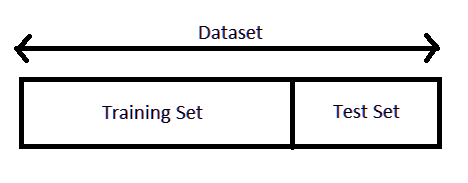

Split data dilakukan untuk membagi data menjadi data latih dan data uji. Data latih merupakan data yang akan digunakan dalam pembentukan model (proses training) sedangkan data uji digunakan untuk melakukan pengujian hasil klasifikasi dari model yang telah dibuat.

In [8]:
# test_size = float(input("Masukkan proporsi jumlah data test (0.1 - 0.9)".ljust(70)))

# Split Data Harga Beli
X_beli_train, X_beli_test,\
y_beli_train, y_beli_test = train_test_split(X_beli, y_beli, test_size=0.2, random_state=42)

# Split Data Harga Jual
X_jual_train, X_jual_test,\
y_jual_train, y_jual_test = train_test_split(X_jual, y_jual, test_size=0.2, random_state=42)

In [9]:
print("Train shape: ", X_beli_train.shape)
print("Test shape: ", X_beli_test.shape)

Train shape:  (1288, 3)
Test shape:  (323, 3)


In [10]:
scaler_beli_x = MinMaxScaler().fit(X_beli_train)
scaler_beli_y = MinMaxScaler().fit(y_beli_train)
scaler_jual_x = MinMaxScaler().fit(X_jual_train)
scaler_jual_y = MinMaxScaler().fit(y_jual_train)

X_beli_train[:] = scaler_beli_x.transform(X_beli_train)
X_beli_test[:] = scaler_beli_x.transform(X_beli_test)
y_beli_train[:] = scaler_beli_y.transform(y_beli_train)
y_beli_test[:] = scaler_beli_y.transform(y_beli_test)

X_jual_train[:] = scaler_jual_x.transform(X_jual_train)
X_jual_test[:] = scaler_jual_x.transform(X_jual_test)
y_jual_train[:] = scaler_jual_y.transform(y_jual_train)
y_jual_test[:] = scaler_jual_y.transform(y_jual_test)

#Training Model

Pada proses training, akan dilakukan perhitungan sesuai dengan rumus multiple linear regression:
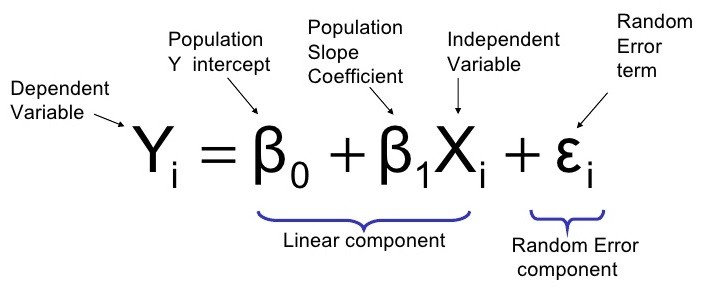

Pada proses ini, data yang diwakili oleh X_train dan target yang diwakili oleh y_train akan dilatih ke-dalam model

In [11]:
# Buat Model
linreg_beli = LinearRegression()
linreg_jual = LinearRegression()

# Fit data ke dalam model
linreg_beli.fit(X_beli_train, y_beli_train)
linreg_jual.fit(X_jual_train, y_jual_train)

# Prediksi
predictions_beli = linreg_beli.predict(X_beli_test)
predictions_jual = linreg_jual.predict(X_jual_test)

#Cek metrik pengukuran

dalam pengukuran ini, matriks yang digunakan berupa $R^{2} score$ dan $MSE$. Selain itu juga dilakukan pengecekan coefficient dan intersep.

Rumus untuk menghitung R2 Score adalah:

$$R^{2}=1 - \frac{RSS}{TSS}$$

sedangkan nilai $MSE$ didapatkan dengan rumus:

$$MSE=\frac{1}{N}.\Sigma_{i=1}^{N}(y - \hat{y})^{2}$$

**Harga Beli**

In [12]:
print("R2 Score :", r2_score(y_beli_test, predictions_beli))
print("MSE :", mean_squared_error(y_beli_test, predictions_beli))
print("RMSE :", mean_squared_error(y_beli_test, predictions_beli, squared=False))
print("Coeeficient :", linreg_beli.coef_)
print("Intercept :", linreg_beli.intercept_)

R2 Score : 0.8100490073315157
MSE : 0.017238298665782758
RMSE : 0.13129470159066875
Coeeficient : [[-0.82566383 -0.49244331  0.24094305]]
Intercept : [1.06782949]


**Harga Jual**

In [ ]:
print("R2 Score :", r2_score(y_jual_test, predictions_jual))
print("MSE :", mean_squared_error(y_jual_test, predictions_jual))
print("RMSE :", mean_squared_error(y_jual_test, predictions_jual, squared=False))
print("Coeficient :", linreg_jual.coef_)
print("Intercept :", linreg_jual.intercept_)

R2 Score : 0.7787739667231445
MSE : 0.017960284473120557
RMSE : 0.13401598588646266
Coeficient : [[-0.78842332 -0.4888515   0.16109534]]
Intercept : [1.03789312]


In [ ]:
# filename = 'finalized_model.sav'
# pickle.dump(linmodel, open(filename, 'wb'))
# predictions_df.tofile('predictions.csv',sep=',',format='%10.5f')

# Algoritma Genetika

## Tahap Pertama, membuat populasi

Pada tahap ini, akan dilakukan inisiasi kromosom pada populasi awal, kromosom yang digunakan berjenis *real-coded genetic algorithm*. Pembantukan dilakukan dengan membangkitkan nilai acak pada interval [-1, 1].

In [13]:
def create_population(size, n_feat):
    population = np.random.uniform(low=-1., high=1., size=(size, n_feat + 1))
    return population

In [16]:
population = create_population(10, X_beli_train.shape[1])  # uji coba
population

array([[-0.78200704, -0.05535483,  0.76945772,  0.72513198],
       [-0.76221562, -0.6565608 , -0.75804021,  0.45683062],
       [-0.36717917,  0.42727895, -0.4593668 ,  0.76728269],
       [-0.49350826, -0.20501652, -0.11616748, -0.40618901],
       [ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
       [-0.60185005,  0.74744823, -0.16247678,  0.02999535],
       [-0.84166067,  0.087247  , -0.7401943 ,  0.61996332],
       [ 0.0150932 , -0.51334138, -0.92469404,  0.22848847],
       [ 0.1197246 ,  0.04659341, -0.08663596,  0.39913802],
       [ 0.869889  , -0.31765451, -0.36603374,  0.4698915 ]])

In [17]:
pd.DataFrame(population).to_excel("population_ori.xlsx")

## Mencari Nilai Fitness

Pada Prosess Fitness, akan dilakukan perhitungan Skor pada setiap MLR dengan kromosom yang telah dibentuk, setiap kromosom yang terbentuk pada proses training akan dicari nilai fitness dengan rumus: 

$$Fitness = \frac{1}{MSE}$$

In [18]:
def get_fitness(model, population, X_train, y_train):
    constant = np.ones(shape=(X_train.shape[0], 1))
    X_train = np.concatenate((constant, X_train), axis=1)
    
    # Lakukan prediksi dengan melakukan perkalian matriks antara koefisien dan data
    predictions = np.matmul(X_train, population.T)
    
    # Hitung nilai fitness
    mse = np.mean((predictions - np.array(y_train))**2, axis=0)
    fitness = 1 / mse

    # urutkan dari terbesar -> terkecil
    inds = np.argsort(fitness)[::-1]  

    return population[inds], fitness[inds]

In [45]:
linreg = LinearRegression()
population_sorted, fitness = get_fitness(linreg, population, X_beli_train, y_beli_train)

In [46]:
population_sorted, fitness

(array([[ 0.1197246 ,  0.04659341, -0.08663596,  0.39913802],
        [ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
        [-0.78200704, -0.05535483,  0.76945772,  0.72513198],
        [-0.36717917,  0.42727895, -0.4593668 ,  0.76728269],
        [-0.60185005,  0.74744823, -0.16247678,  0.02999535],
        [ 0.0150932 , -0.51334138, -0.92469404,  0.22848847],
        [-0.49350826, -0.20501652, -0.11616748, -0.40618901],
        [-0.76908806, -0.31765451, -0.36603374,  0.4698915 ],
        [-0.84166067,  0.087247  , -0.7401943 ,  0.61996332],
        [-0.76221562, -0.6565608 , -0.75804021,  0.45683062]]),
 array([8.59197042, 3.9143289 , 2.81407333, 1.93482616, 1.3456395 ,
        0.70292372, 0.68286799, 0.47847952, 0.4277397 , 0.2872693 ]))

In [47]:
pd.DataFrame(population_sorted).to_excel("population_sorted.xlsx")
pd.DataFrame(fitness).to_excel("fitness_sorted.xlsx")

## Ellitism

In [63]:
next_gen = population_sorted[:2]
next_gen

array([[ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ],
       [ 0.51847404,  0.68400258, -0.65776104, -0.45828764]])

In [64]:
pd.DataFrame(next_gen).to_excel("ellisitm.xlsx")

## Seleksi

Pada tahap ini akan dipilih populasi-populasi yang unggul berdasarkan skor fitness yang didapatkan pada proses sebelumnya, disini kromosom akan diseleksi secara acak berdasarkan nilai fitnessnya, semakin tinggi nilainya semakin tinggi kemungkinan dipilihnya. Kemudian akan dilanjutkan pada tahap cross over atau kawin silang.

In [22]:
def selection_pair(population, fitness):
    length = len(population)
    probabilities = fitness / np.sum(fitness)
    chromosome_index = np.arange(length)
    selection_index = np.random.choice(chromosome_index, size=2, p=probabilities)
    return population[selection_index]

In [60]:
selection_len = (len(population) - 2) // 2
selection_len

4

In [53]:
selections = selection_pair(population_sorted, fitness)
selections

array([[ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ],
       [ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ]])

In [62]:
selections_full = np.vstack(
    selection_pair(population_sorted, fitness) for i in range(selection_len)
)

array([[ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
       [ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ],
       [-0.60185005,  0.74744823, -0.16247678,  0.02999535],
       [ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
       [-0.78200704, -0.05535483,  0.76945772,  0.72513198],
       [ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
       [ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ],
       [-0.78200704, -0.05535483,  0.76945772,  0.72513198]])

In [30]:
pd.DataFrame(selections).to_excel("selection.xlsx")

## Cross Over
Cross over dilakukan dengan proses perhitungan aritmetika antara dua parents dengan menggunakan rumus:

$$child = \alpha . \bar{x} + (1 - \alpha) . \bar{y}$$

Dimana $\bar{x}$ dan $\bar{y}$ merupakan nilai gen dari dua parents yang berbeda, dan juga $\alpha$ adalah variabel pengali yang berkisar antara 0 - 1.

In [25]:
def crossover(chrom1, chrom2, alpha=0.4, crossover_rate=0.9):
    odds = np.random.random()
        
    if odds < crossover_rate:
        chrom1 = alpha * chrom1 + (1 - alpha) * chrom2
        chrom2 =  alpha * chrom2 + (1 - alpha) * chrom1

    return chrom1, chrom2

In [26]:
crossover_pop = crossover(selections_full[0], selections_full[1])
crossover_pop

(array([ 0.869889  , -0.31765451, -0.36603374,  0.4698915 ]),
 array([ 0.1197246 ,  0.04659341, -0.08663596,  0.39913802]))

In [65]:
crossover_full = np.vstack(
    [crossover(selections_full[i], selections_full[i + 1]) for i in range(len(selections_full) // 2)]
)
pd.DataFrame(crossover_full).to_excel("crossover.xlsx")

## Mutasi
Mutasi dilakukan dengan memilih $n$ gen pada kromosom secara acak lalu gen-gen yang terpilih, akan di setel ulang dengan angka pada interval [-1, 1]. Jumlah gen yang dipilih adalah $N \times Mr$, dimana $N$ adalah jumlah seluruh gen pada kromosom dan $Mr$ adalah mutation rate.

In [33]:
def mutation(chrom, mutation_rate=0.9):
    length = len(chrom)
    mutation_size = int(mutation_rate * length)
    
    random_gene = np.random.randint(0, length, size=mutation_size)
    mutated_gene = np.random.uniform(-1., 1., size=mutation_size)
    chrom[random_gene] = mutated_gene

    return chrom

In [66]:
mutated_pop = mutation(crossover_full[0])
mutated_pop

array([ 0.27922437,  0.58352039, -0.31508599,  0.34322898])

In [67]:
mutation_full = np.vstack(
    [mutation(crossover_full[i]) for i in range(len(crossover_full))]
)
mutation_full

array([[ 0.27922437,  0.27973552,  0.71297713,  0.32881261],
       [-0.03259659,  0.57107097, -0.22370598, -0.00214693],
       [ 0.02731832, -0.80646478, -0.96498046,  0.07475621],
       [-0.42867214, -0.3313418 , -0.8550967 , -0.97067904],
       [ 0.64858794,  0.70938084, -0.42094073, -0.26297444],
       [-0.73037898,  0.9620931 ,  0.21532993, -0.34109972],
       [-0.45042773,  0.24038813, -0.7070951 ,  0.25176413],
       [-0.46989158,  0.00117999,  0.42692522, -0.11966728]])

In [68]:
pd.DataFrame(mutation_full).to_excel("mutation.xlsx")

## Perbarui Populasi

In [69]:
new_population = np.concatenate([next_gen, mutation_full])
new_population

array([[ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ],
       [ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
       [ 0.27922437,  0.27973552,  0.71297713,  0.32881261],
       [-0.03259659,  0.57107097, -0.22370598, -0.00214693],
       [ 0.02731832, -0.80646478, -0.96498046,  0.07475621],
       [-0.42867214, -0.3313418 , -0.8550967 , -0.97067904],
       [ 0.64858794,  0.70938084, -0.42094073, -0.26297444],
       [-0.73037898,  0.9620931 ,  0.21532993, -0.34109972],
       [-0.45042773,  0.24038813, -0.7070951 ,  0.25176413],
       [-0.46989158,  0.00117999,  0.42692522, -0.11966728]])

In [70]:
pd.DataFrame(new_population).to_excel("new_population.xlsx")

## Menghitung Fitness

In [73]:
new_population_sorted, new_fitness = get_fitness(linreg, new_population, X_beli_train, y_beli_train)
new_population_sorted, new_fitness

(array([[ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ],
        [ 0.51847404,  0.68400258, -0.65776104, -0.45828764],
        [-0.03259659,  0.57107097, -0.22370598, -0.00214693],
        [ 0.64858794,  0.70938084, -0.42094073, -0.26297444],
        [-0.46989158,  0.00117999,  0.42692522, -0.11966728],
        [ 0.27922437,  0.27973552,  0.71297713,  0.32881261],
        [-0.73037898,  0.9620931 ,  0.21532993, -0.34109972],
        [-0.45042773,  0.24038813, -0.7070951 ,  0.25176413],
        [ 0.02731832, -0.80646478, -0.96498046,  0.07475621],
        [-0.42867214, -0.3313418 , -0.8550967 , -0.97067904]]),
 array([5.69118025, 3.9143289 , 3.68395638, 3.17452323, 1.99511833,
        1.93957603, 1.42175601, 0.74364146, 0.51464689, 0.29589072]))

In [74]:
pd.DataFrame(new_population_sorted).to_excel("new_population_sorted.xlsx")
pd.DataFrame(new_fitness).to_excel("new_fitness_sorted.xlsx")

## Kromosom Terbaik

In [75]:
best_chrom = new_population_sorted[0]
best_fitness = new_fitness[0]

best_chrom, best_fitness

(array([ 0.1197246 ,  0.51653225, -0.08663596,  0.1418975 ]),
 5.691180253606159)

## Iterasi

Pada tiap iterasi, akan dilakukan proses genetika yang berulang untuk mendapatkan kromosom terbaik serta hasil skor yang terbaik, kromosom terbaik akan digunakan untuk mekanisme pembentukan model selanjutnya.

In [ ]:
def generations(size, n_feat, n_gen, X_train, y_train, crossover_rate=0.9, mutation_rate=0.5):
    print("START")
    # Inisiasi model regresi
    linreg = LinearRegression()

    # Bangkitkan kromosom secara acak
    population = create_population(size, n_feat)

    for i in range(n_gen):
        # Hitung skor fitness masing-masing kromosom
        population, fitness = get_fitness(linreg, population, X_train, y_train)

        # Catat populasi dan fitness setiap 10 iterasi
        if (i + 1) % 10 == 0:
            print(f"Iteration {i + 1}")
            print("=" * 20)
            print(f"Best chromosome:\n{population[0]}")
            print(f"Best fitness:\n{fitness[0]}")
            print()

        # Simpan 2 kromosom terbaik untuk generasi berikutnya
        next_gen = list(population[:2])

        for i in range( int(size / 2) - 1 ):
            
            # Seleksi 2 kromosom secara acak
            parents_a, parents_b = selection_pair(population, fitness)

            # Kawin silang pada 2 induk dan menghasilkan 2 keturunan
            offspring_a, offspring_b = crossover(parents_a, parents_b, crossover_rate)

            # Mutasi pada hasil keturunan
            offspring_a = mutation(offspring_a, mutation_rate)
            offspring_b = mutation(offspring_b, mutation_rate)

            # Ikut sertakan 2 keturunan tadi ke generasi berikutnya
            next_gen.append(offspring_a)
            next_gen.append(offspring_b)

        # Perbarui populasi lama dengan populasi baru
        population = np.array(next_gen)

    # Optimasi parameter regresi
    linreg.intercept_ = population[0][0:1]
    linreg.coef_ = population[0][1:].reshape(1, -1)

    return population, fitness, linreg

## Pemilihan Parameter Algoritma Genetika

In [ ]:
# size = int(input("Masukkan ukuran populasi (int)".ljust(70)))
# n_gen = int(input("Masukkan jumlah generasi (int)".ljust(70)))
# cr = float(input("Masukkan probabilitas crossover (0.0 - 1.0)".ljust(70)))
# mr = float(input("Masukkan probabilitas mutasi (0.0 - 1.0)".ljust(70)))

## Algoritma Genetik pada Harga Beli

In [ ]:
population_beli, fitness_beli, linreg_beli_ga  = generations(size=100, 
                                                             n_feat=X_beli.shape[1], 
                                                             n_gen=100, 
                                                             X_train=X_beli_train, 
                                                             y_train=y_beli_train,) 

START
Iteration 10
Best chromosome:
[ 0.75222643 -0.69816117 -0.26562726  0.51061815]
Best fitness:
54.344550443622566

Iteration 20
Best chromosome:
[ 0.90411668 -0.68075017 -0.39259115  0.43180019]
Best fitness:
59.053051712149696

Iteration 30
Best chromosome:
[ 0.86595127 -0.78509852 -0.28016708  0.37115783]
Best fitness:
62.05944121625283

Iteration 40
Best chromosome:
[ 0.86595127 -0.78509852 -0.28016708  0.37115783]
Best fitness:
62.05944121625283

Iteration 50
Best chromosome:
[ 0.86595127 -0.78509852 -0.28479625  0.37115783]
Best fitness:
62.07328000813034

Iteration 60
Best chromosome:
[ 0.86595127 -0.78509852 -0.28479625  0.37115783]
Best fitness:
62.07328000813034

Iteration 70
Best chromosome:
[ 0.86595127 -0.78509852 -0.28479625  0.37115783]
Best fitness:
62.07328000813034

Iteration 80
Best chromosome:
[ 0.86595127 -0.78509852 -0.28479625  0.37115783]
Best fitness:
62.07328000813034

Iteration 90
Best chromosome:
[ 0.86440173 -0.74952607 -0.30587798  0.39013837]
Best fit

## Algoritma Genetik pada Harga Jual

In [ ]:
population_jual, fitness_jual, linreg_jual_ga = generations(size=100, 
                                                            n_feat=X_jual.shape[1], 
                                                            n_gen=100, 
                                                            X_train=X_jual_train, 
                                                            y_train=y_jual_train,) 

START
Iteration 10
Best chromosome:
[ 0.79290635 -0.79228982 -0.31419417  0.5017483 ]
Best fitness:
49.16214549098456

Iteration 20
Best chromosome:
[ 0.83513088 -0.65987908 -0.37089181  0.44020297]
Best fitness:
57.26093772119006

Iteration 30
Best chromosome:
[ 0.8346532  -0.64007844 -0.36976807  0.39753096]
Best fitness:
57.54420791462968

Iteration 40
Best chromosome:
[ 0.82335978 -0.65987908 -0.37089181  0.44020297]
Best fitness:
57.985537025263845

Iteration 50
Best chromosome:
[ 0.83363679 -0.6418605  -0.3802383   0.40137144]
Best fitness:
58.32091915921926

Iteration 60
Best chromosome:
[ 0.82359692 -0.64762331 -0.36213816  0.34585908]
Best fitness:
58.65603651699872

Iteration 70
Best chromosome:
[ 0.82359692 -0.64762331 -0.36213816  0.34585908]
Best fitness:
58.65603651699872

Iteration 80
Best chromosome:
[ 0.82359692 -0.64762331 -0.36213816  0.34585908]
Best fitness:
58.65603651699872

Iteration 90
Best chromosome:
[ 0.82359692 -0.64762331 -0.36213816  0.34585908]
Best fitn

## Simpan Kromosom Terbaik
Kromosom terbaik lalu disimpan ke-dalam disk supaya dapat digunakan untuk melakukan prediksi dan nantinya dibandingkan dengan regresi linier biasa.

In [ ]:
# Kromosom terbaik pada dua jenis harga
best_chromosome_beli = population_beli[0]
best_chromosome_jual = population_jual[0]

## Prediksi melalui koefisien hasil Algoritma Genetika
Kromosom terbaik perlu kita uji performanya, apakah error yang dihasilkan lebih kecil dari regresi linier biasa atau tidak.

In [ ]:
predictions_beli_ga = linreg_beli_ga.predict(X_beli_test)
predictions_jual_ga = linreg_jual_ga.predict(X_jual_test)

In [ ]:
predictions_beli_ga[:10]

array([[0.15447559],
       [0.10259617],
       [0.1635426 ],
       [0.18159295],
       [0.10162324],
       [0.43351023],
       [0.7598365 ],
       [0.21274071],
       [0.21274071],
       [0.40431657]])

## Cek metrik pengukuran
dalam pengukuran ini, matriks yang digunakan berupa $R^{2} score$ dan $MSE$

selain itu juga dilakukan pengecekan coefficient dan intersep.



**Harga Beli**

In [ ]:
print("R2 Score :", r2_score(y_beli_test, predictions_beli_ga))
print("MSE :", mean_squared_error(y_beli_test, predictions_beli_ga))
print("RMSE :", mean_squared_error(y_beli_test, predictions_beli_ga, squared=False))
print("Coeeficient :", population_beli[0, 1:])
print("Intercept :", population_beli[0, 0])

R2 Score : 0.7996091026750844
MSE : 0.01818573353822877
RMSE : 0.13485449024125512
Coeeficient : [-0.74952607 -0.30587798  0.39013837]
Intercept : 0.8644017335153278


**Harga Jual**

In [ ]:
print("R2 Score :", r2_score(y_jual_test, predictions_jual_ga))
print("MSE :", mean_squared_error(y_jual_test, predictions_jual_ga))
print("RMSE :", mean_squared_error(y_jual_test, predictions_jual_ga, squared=False))
print("Coeeficient :", population_jual[0, 1:])
print("Intercept :", population_jual[0, 0])

R2 Score : 0.7630709201521295
MSE : 0.01923513978437201
RMSE : 0.1386908064161861
Coeeficient : [-0.64762331 -0.36213816  0.34585908]
Intercept : 0.8235969173754699


# Perbandingan Prediksi Regresi Linier dan Regresi Linier + Algoritma Genetika

## Pemilihan Prediksi Harga
Kita bisa memilih akan memprediksi harga beli atau jual.

In [ ]:
# Input jenis harga
mode = input("Masukkan harga emas apa yang ingin diprediksi (beli / jual)".ljust(70))

# Validasi input user
assert mode.lower() in ["beli", "jual"], "Tolong masukkan antara 'beli' atau 'jual'"

# Inisiasi variabel berdasarkan jenis
X_used = X_beli                             if mode.lower() == "beli" else X_jual
y_used = y_beli                             if mode.lower() == "beli" else y_jual
X_test_used = X_beli_test                   if mode.lower() == "beli" else X_jual_test
y_test_used = y_beli_test                   if mode.lower() == "beli" else y_jual_test
predictions_used = predictions_beli         if mode.lower() == "beli" else predictions_jual
predictions_ga_used = predictions_beli_ga   if mode.lower() == "beli" else predictions_jual_ga
linreg_used = linreg_beli                   if mode.lower() == "beli" else linreg_jual
linreg_ga_used = linreg_beli_ga             if mode.lower() == "beli" else linreg_jual_ga

Masukkan harga emas apa yang ingin diprediksi (beli / jual)           beli


## Rekap

In [ ]:
# Kita ubah hasil prediksi dari dataframe ke 1D-array
y_test_series = np.squeeze(y_test_used.values)
predictions_series = np.squeeze(predictions_used)
predictions_ga_series = np.squeeze(predictions_ga_used)


rekap = pd.DataFrame({
    "Y_test": y_test_series,
    "MLR Without Genetic": predictions_series,
    "MLR With Genetic": predictions_ga_series,
    "Error MLR": abs(y_test_series - predictions_series),
    "Error MLR+Genetic": abs(y_test_series - predictions_ga_series),
    "Error MSE MLR": abs(y_test_series - predictions_series)**2,
    "Error MSE MLR+Genetic": abs(y_test_series - predictions_ga_series)**2,
    "Error RMSE MLR": np.sqrt(abs(y_test_series - predictions_series)**2),
    "Error RMSE MLR+Genetic": np.sqrt(abs(y_test_series - predictions_ga_series)**2),
}, index=y_beli_test.index)

rekap

,Y_test,MLR Without Genetic,MLR With Genetic,Error MLR,Error MLR+Genetic,Error MSE MLR,Error MSE MLR+Genetic,Error RMSE MLR,Error RMSE MLR+Genetic
Date,,,,,,,,,
2017-01-30,0.026871,0.176458,0.154476,0.149587,0.127604,0.022376,0.016283,0.149587,0.127604
2017-09-17,0.089841,0.129588,0.102596,0.039747,0.012755,0.001580,0.000163,0.039747,0.012755
2018-01-19,0.124699,0.161507,0.163543,0.036809,0.038844,0.001355,0.001509,0.036809,0.038844
2018-03-02,0.147939,0.164505,0.181593,0.016567,0.033654,0.000274,0.001133,0.016567,0.033654
2017-08-28,0.097587,0.132270,0.101623,0.034682,0.004036,0.001203,0.000016,0.034682,0.004036
...,...,...,...,...,...,...,...,...,...
2019-09-27,0.395393,0.237127,0.257731,0.158266,0.137662,0.025048,0.018951,0.158266,0.137662
2021-04-08,0.809981,0.749810,0.735784,0.060171,0.074197,0.003621,0.005505,0.060171,0.074197
2018-05-29,0.130511,0.191353,0.232887,0.060842,0.102377,0.003702,0.010481,0.060842,0.102377


## Rata-rata Error

In [ ]:
mean_mse_error = rekap["Error MSE MLR"].mean()
mean_ga_mse_error = rekap["Error MSE MLR+Genetic"].mean()

print("Rata-rata error MSE dengan algoritma genetika sebesar        :", mean_ga_mse_error)
print("Rata-rata error MSE tanpa genetika                           :", mean_mse_error)
print("Rata-rata error RMSE dengan algoritma genetika sebesar       :", np.sqrt(mean_ga_mse_error))
print("Rata-rata error RMSE tanpa genetika                          :", np.sqrt(mean_mse_error))

Rata-rata error MSE dengan algoritma genetika sebesar        : 88.67149982506649
Rata-rata error MSE tanpa genetika                           : 89.33605540296377
Rata-rata error RMSE dengan algoritma genetika sebesar       : 9.416554562315588
Rata-rata error RMSE tanpa genetika                          : 9.451775251399273


## Diagram Batang Error

In [ ]:
days = 30
different = rekap[["Error MSE MLR", "Error MSE MLR+Genetic"]].iloc[:days]
dates_str = [a.strftime("%Y-%m-%d") for a in different.index]
different["date"] = dates_str

p = figure(width=900, height=500, x_range=dates_str)

v1 = p.vbar(x=dodge("date", -0.11, range=p.x_range), width=0.2, top="Error MSE MLR", 
            color=Category10_4[0], source=different)

v2 = p.vbar(x=dodge("date", 0.11, range=p.x_range), width=0.2, top="Error MSE MLR+Genetic", 
            color=Category10_4[1], source=different)

legend = Legend(items=[
    ("Error MSE MLR", [v1]), 
    ("Error MSE MLR+Genetic", [v2])
], location="left")

p.xaxis.major_label_orientation = "vertical"
p.add_layout(legend, "above")

show(p)

## Diagram Garis Error

In [ ]:
p = figure(width=900, height=500, x_range=dates_str, title="")

l1 = p.line(x="date", y="Error MSE MLR", line_width=1.5, color=Category10_4[0], source=different)
c1 = p.circle(x="date", y="Error MSE MLR", size=5, color=Category10_4[0], source=different)
l2 = p.line(x="date", y="Error MSE MLR+Genetic", line_width=1.5, color=Category10_4[1], source=different)
c2 = p.circle(x="date", y="Error MSE MLR+Genetic", size=5, color=Category10_4[1], source=different)

legend = Legend(items=[
    ("Error MSE MLR", [l1, c1]), 
    ("Error MSE MLR+Genetic", [l2, c2])
], location="left")

p.xaxis.major_label_orientation = "vertical"
p.add_layout(legend, "above")

show(p)

## Prediksi pada Jangka Waktu Tertentu

In [ ]:
def predict_future(steps, X, model, colname):
    predictions = []
    dates = []

    # Ambil indeks terakhir pada data
    feature = X.iloc[-1:].copy()
    for step in range(steps):
        # Prediksi pada masa depan
        prediction = model.predict(feature)[0][0]
        
        # Simpan tanggal dan hasil prediksi
        feature.index += pd.Timedelta(days=1)
        predictions.append(prediction)
        dates.append(feature.index[0])

        # Ganti fitur data dengan hasil prediksi sebelumnya
        feature = feature.shift(axis=1).replace(np.nan, prediction)

    return pd.DataFrame(predictions, columns=[colname], index=dates)

Uji coba fungsi

In [ ]:
predict_future(2, X_test_used, linreg_ga_used, "prediksi_")

,prediksi_
2021-08-01,849.512548
2021-08-02,851.426636


Terapkan Fungsi

In [ ]:
jangka_waktu = int(input("Masukkan Jangka Waktu Prediksi (hari)".ljust(70)))
prediction_columns = ["Y_test", "MLR Without Genetic", "MLR With Genetic"]
error_columns = ["Error MSE MLR", "Error MSE MLR+Genetic", "Error RMSE MLR", "Error RMSE MLR+Genetic"]
prediksi_df = rekap[prediction_columns + error_columns]

# Dapatkan hasil prediksi pada masa depan
prediksi_lanjut = predict_future(steps=jangka_waktu, 
                                 X=X_test_used, 
                                 model=linreg_used,
                                 colname="MLR Without Genetic")

prediksi_lanjut_ga = predict_future(steps=jangka_waktu, 
                                    X=X_test_used, 
                                    model=linreg_ga_used,
                                    colname="MLR With Genetic")

# Gabungkan hasil prediksi
prediksi_lanjut_gabungan = pd.concat([prediksi_lanjut, prediksi_lanjut_ga], axis=1)
prediksi_df = prediksi_df.append(prediksi_lanjut_gabungan)

# DataFrame pada waktu tertentu
prediksi_tertentu_df = prediksi_df.iloc[-jangka_waktu * 2:]

# Buat kolom tanggal
dates_str = [date.strftime("%Y-%m-%d") for date in prediksi_tertentu_df.index]
prediksi_tertentu_df["date"] = dates_str
print()

# Tampilkan diagram garis prediksi
items1 = []
p1 = figure(width=900, height=600, x_range=dates_str, 
           title=f"Prediksi Harga {mode.title()} pada Jangka Waktu {jangka_waktu} Hari")

for name, color in zip(prediction_columns, Category10_3):
    line = p1.line(x="date", y=name, line_width=1.5, color=color, source=prediksi_tertentu_df)
    scatter = p1.scatter(x="date", y=name, size=3, color=color, source=prediksi_tertentu_df)
    p1.xaxis.major_label_orientation = "vertical"
    p1.legend.location = "top_left"
    items1.append((name, [line, scatter]))

# Tempelkan legenda
p1.add_layout(Legend(items=items1, location="left"), "above")


# Tampilkan diagram garis error
items2 = []
p2 = figure(width=900, height=600, x_range=dates_str, 
           title=f"Prediksi Harga {mode.title()} pada Jangka Waktu {jangka_waktu} Hari")

for name, color in zip(error_columns, Category10_4):
    line = p2.line(x="date", y=name, line_width=1.5, color=color, source=prediksi_tertentu_df)
    scatter = p2.scatter(x="date", y=name, size=3, color=color, source=prediksi_tertentu_df)
    p2.xaxis.major_label_orientation = "vertical"
    p2.legend.location = "top_left"
    items2.append((name, [line, scatter]))

# Tempelkan legenda
p2.add_layout(Legend(items=items2, location="left"), "above")


layout = column(p1, Div(), p2)
show(layout)

Masukkan Jangka Waktu Prediksi (hari)                                 10



## Tabel Prediksi

In [ ]:
prediksi_df.iloc[-jangka_waktu * 2:]

,Y_test,MLR Without Genetic,MLR With Genetic,Error MSE MLR,Error MSE MLR+Genetic,Error RMSE MLR,Error RMSE MLR+Genetic
2021-07-22,843.0,845.259919,845.608342,5.107234,6.803447,2.259919,2.608342
2021-07-23,843.0,844.016638,844.028253,1.033552,1.057303,1.016638,1.028253
2021-07-24,840.0,843.532757,843.410916,12.480369,11.634345,3.532757,3.410916
2021-07-25,840.0,841.054701,841.288979,1.112395,1.661466,1.054701,1.288979
2021-07-26,839.0,840.888959,840.836585,3.568165,3.373043,1.888959,1.836585
2021-07-27,837.0,839.612618,839.605154,6.825774,6.786828,2.612618,2.605154
2021-07-28,837.0,838.058956,838.235548,1.121387,1.526578,1.058956,1.235548
2021-07-29,842.0,837.750861,837.692057,18.055182,18.558375,4.249139,4.307943
2021-07-30,850.0,841.988193,841.654673,64.189046,69.644475,8.011807,8.345327
2021-07-31,843.0,849.669915,849.512548,44.487769,42.413282,6.669915,6.512548


# Prediksi pada Tanggal Tertentu

In [ ]:
awal = X_used.index[0].strftime("%d/%m/%Y")
akhir = X_used.index[-1].strftime("%d/%m/%Y")

def prediction_date_based(date, X, y, model_regular, model_ga):
    # Validasi tanggal
    pd_date = pd.to_datetime(date, format="%d/%m/%Y")
    assert pd_date >= X.index[0], f"Date must be more than {awal}"

    # Jika dalam jangkauan data
    if pd_date <= X.index[-1]:
        # Fitur data
        feature = X.loc[pd_date: pd_date + pd.Timedelta(days=1)]

        # Prediksi
        predictions = y.copy().loc[pd_date]
        predictions.columns = ["Y_actual"]
        predictions["MLR Without GA"] = model_regular.predict(feature)[0][0]
        predictions["MLR With Genetic"] = model_ga.predict(feature)[0][0]

    # Jika pada masa depan
    else:
        steps = pd_date - X.index[-1]
        steps = steps.days
        predictions = predict_future(steps, X, linreg_used, "MLR Without GA")
        predictions_ga = predict_future(steps, X, linreg_ga_used, "MLR With Genetic")
        predictions = pd.concat([predictions, predictions_ga], axis=1).iloc[-1:]

    return predictions

In [ ]:
# Parameter mode harga
predictions_params = {
    "beli": [X_beli, y_beli, linreg_beli, linreg_beli_ga],
    "jual": [X_jual, y_jual, linreg_jual, linreg_jual_ga]
}

# Tampilkan info tanggal
print(f"Tanggal prediksi mulai dari {awal}")
print("=" * 50)

# Input tanggal tertentu
mode = input("Masukkan harga emas apa yang ingin diprediksi (beli / jual)".ljust(70))
tahun = int(input("Masukkan tahun".ljust(70)))
bulan = int(input("Masukkan bulan:".ljust(70)))
hari = int(input("Masukkan hari:".ljust(70)))
print("-" * 20)
tanggal = f"{hari}/{bulan:02d}/{tahun}"

# Tampilkan hasil prediksi
hasil_prediksi = prediction_date_based(tanggal, *predictions_params[mode.lower()])
hasil_prediksi

Tanggal prediksi mulai dari 05/01/2017
Masukkan harga emas apa yang ingin diprediksi (beli / jual)           jual
Masukkan tahun                                                        2021
Masukkan bulan:                                                       12
Masukkan hari:                                                        7
--------------------


,MLR Without GA,MLR With Genetic
2021-12-07,961.90644,983.1414
